<a href="https://colab.research.google.com/github/DiaaAlqadi/Netflix-Amazon-and-Disney-Movies-and-TV-shows/blob/main/Netflix%2C_Amazon_and_Disney%2B_Movies_and_TV_shows_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix, Amazon and Disney+ Movies and TV shows

## About the datasets:

 Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.
 
 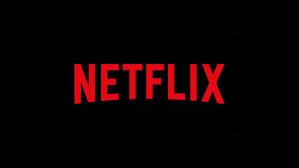

Disney+ is another one of the most popular media and video streaming platforms. They have close to 1300 movies or tv shows available on their platform, as of mid-2021, they have over 116M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Amazon Prime, along with details such as - cast, directors, ratings, release year, duration, etc.


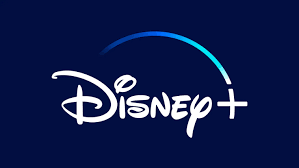

mazon Prime is another one of the most popular media and video streaming platforms. They have close to 10000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Amazon Prime, along with details such as - cast, directors, ratings, release year, duration, etc.


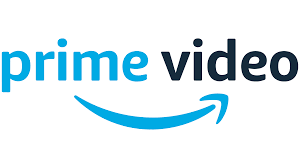

## The columns of the datasets:

**id_show**: Unique ID for every Movie / Tv Show

**type** : Movie or Tv Show

**title** : Title of the movie or tv show

**director** : The director of the movie or show

**cast** : The cast of the movie or show

**country** : Country of production

**date_added** : Date added on the platform

**release_year** : The year of release of the movie or show

**rating** : The rating of the movie or show

**duration** : Duration of the movie or show

**listed_in** : Genere

**description** : The description of the movie or show



In [39]:
from google.colab import drive
 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Importing the libraries:

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import math 
%matplotlib inline 
from statistics import mode
import warnings
warnings.filterwarnings('ignore')

## Importing data:

In [41]:
netflix=pd.read_csv('/content/netflix_titles.csv')
amazon=pd.read_csv('/content/amazon_prime_titles.csv')
disney=pd.read_csv('/content/disney_plus_titles.csv')


## Discovering Data:

In [42]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [43]:
disney.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...


In [44]:
amazon.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...


## Some information about the data:

In [45]:
print('The shape of netflix dataset : ',netflix.shape)
print('The shape of amazon dataset : ',amazon.shape)
print('The shape of disney dataset : ',disney.shape)

The shape of netflix dataset :  (8807, 12)
The shape of amazon dataset :  (9668, 12)
The shape of disney dataset :  (1450, 12)


In [46]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


The dataset contains nulls.

In [47]:
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


The dataset contains nulls.

In [48]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


The dataset contains nulls.

## Concatinating the datasets into one dataset:


In [49]:
netflix['platform']='netflix'
amazon['platform']='amazon'
disney['platform']= 'disney'

We added a new column to the data set called **platform** so that we can filter the movies and the shows based on it.

In [84]:
df=pd.concat([netflix,amazon,disney],ignore_index=True)
df['date_added'] = df['date_added'].str.strip()
df['date_added']= pd.to_datetime(df['date_added'], format='%B %d, %Y')
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",netflix


After concatination, we transformed the date's type from string to **datetime** so that we can deal with it and extract insights easly.

In [51]:
df.shape

(19925, 13)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19925 entries, 0 to 19924
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       19925 non-null  object        
 1   type          19925 non-null  object        
 2   title         19925 non-null  object        
 3   director      14736 non-null  object        
 4   cast          17677 non-null  object        
 5   country       9879 non-null   object        
 6   date_added    10399 non-null  datetime64[ns]
 7   release_year  19925 non-null  int64         
 8   rating        19581 non-null  object        
 9   duration      19922 non-null  object        
 10  listed_in     19925 non-null  object        
 11  description   19925 non-null  object        
 12  platform      19925 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 2.0+ MB


In [76]:
df.duplicated().sum()

0

There is not a single duplicate value present in our dataset.



## Cleaning the data:

### Handling the null values:


In [53]:
df['country'].fillna(df['country'].mode()[0],inplace=True)

The mode for the column 'country'.

Here we replaced the missing value of the country table with the mode of this coluns which is (The United States).

In [54]:
df['country'].isna().value_counts()

False    19925
Name: country, dtype: int64

There are no missing values now in country column.

In [55]:
df['director'].fillna('Unknown',inplace=True)

In [56]:
df['director'].isna().value_counts()

False    19925
Name: director, dtype: int64

We replaced the null values of this column to a default value: (Unknown), because it does not make sense to use the mode in this condition.

In [57]:
df['cast'].fillna('Unknown',inplace=True)
df['cast'].isna().value_counts()

False    19925
Name: cast, dtype: int64

In [58]:
mean_date_added = df['date_added'].mean()
df['date_added']=df['date_added'].fillna(mean_date_added)
df['date_added'].isna().value_counts()

False    19925
Name: date_added, dtype: int64

There are a kot of ways to handle missing dates in python , in this particular notebook, we will replace the nulls with the mean of the dates.

There are other ways like dropping the missing values or using external datasets , but here we will assume that the mean method is a valid way to handle the dates.


Removing the remaining rows with null values:

In [59]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19578 entries, 0 to 19924
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       19578 non-null  object        
 1   type          19578 non-null  object        
 2   title         19578 non-null  object        
 3   director      19578 non-null  object        
 4   cast          19578 non-null  object        
 5   country       19578 non-null  object        
 6   date_added    19578 non-null  datetime64[ns]
 7   release_year  19578 non-null  int64         
 8   rating        19578 non-null  object        
 9   duration      19578 non-null  object        
 10  listed_in     19578 non-null  object        
 11  description   19578 non-null  object        
 12  platform      19578 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 2.1+ MB


Now there are no missing values in the data set.

In [65]:
df_movies=df[df['type']=='Movie']
df_shows=df[df['type']=='TV Show']


Splitting the dataset into movies dataset and shows dataset.

## Extracting insights from the data:
##### One way of handling the null values is imputing missing values with a default value or the mode of non-null values (assuming that the missing data are missing completely at random (MCAR) or missing at random (MAR).)

In [60]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

There are two types of programs : Movies and TV Shows.

In [61]:
np.size(df['director'].unique())

9904

There are 9904 directors in this dataset.

In [74]:
df['rating'].value_counts()

TV-MA       3284
TV-14       2447
13+         2117
R           1809
16+         1547
TV-PG       1333
ALL         1268
18+         1243
PG-13        949
PG           776
TV-G         619
TV-Y7        504
TV-Y         431
G            387
7+           385
NR           303
TV-NR        105
UNRATED       33
TV-Y7-FV      19
NC-17          6
AGES_18_       3
UR             3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: rating, dtype: int64

These are the MPA Film Ratings.
MPA stands for Motion Picture Associations, their film rating system provides parents with the information needed to determine if a film is appropriate for their children.
Ratings Guide:
TV-MA : Unsuitable for children under 17 (Mature Audience Only).

* **TV-MA** : Unsuitable for children under 14.
* **TV-PG** : Parents or guardians may find inappropriate for younger children.
* **R** : Under 17 requires accompanying parent or adult guardian (Restricted).
* **PG-13** : Parents strongly cautioned, some material may be inappropriate for children under 13.
* **V-Y** : Programs aimed at a very young audience, including children from ages 2-6.
* **TV-Y7** : Programs most appropriate for children age 7 and up.
* **PG** : Some material may not be suitable for children (Parental Guidance suggested).
* **TV-G** : Programs suitable for all ages; these are not necessarily children's shows.
* **NR** : (Not Rated)
* **G** : (General Audiences)
* **TV-Y7-FV** : Programming with fantasy violence that may be more intense or more combative than other programming in the TV-Y7 category.
* **UR** : (Un-rated) (Same as NR)
* **NC-17** : No children under 17

The oldest 10 **Movies**:

In [82]:
oldest_10_movies=df_movies.sort_values('release_year').head(10)
oldest_10_movies[['title','release_year','rating','platform']]

,title,release_year,rating,platform
8890,Within Our Gates,1920,13+,amazon
10281,Nomads Of The North,1920,13+,amazon
10091,Pollyanna,1920,NR,amazon
10232,One Exciting Night,1922,13+,amazon
9950,Robin Hood (Silent),1922,13+,amazon
10491,Merry-Go-Round,1923,13+,amazon
9941,Romola,1924,NR,amazon
16405,The Monster - Lon Chaney's Uncut Horror Classic!,1925,13+,amazon
16425,Lon Chaney in The Unholy Three - The Original ...,1925,13+,amazon
9492,The Eagle (No Dialog),1925,13+,amazon


The oldest 10 **TV Shows**:

In [83]:
oldest_10_shows=df_shows.sort_values('release_year').head(10)
oldest_10_shows[['title','release_year','rating','platform']]

,title,release_year,rating,platform
4250,Pioneers: First Women Filmmakers*,1925,TV-14,netflix
17821,Last Frontier,1932,TV-NR,amazon
9550,The Best of The Three Stooges in Color!,1936,7+,amazon
1331,Five Came Back: The Reference Films,1945,TV-MA,netflix
10801,Jungle Queen: 2K Restored Special Edition,1945,13+,amazon
11949,Basil Rathbone Sherlock Holmes in Color!,1946,7+,amazon
7743,Pioneers of African-American Cinema,1946,TV-14,netflix
17887,The Best of I Love Lucy,1954,TV-PG,amazon
10336,Napoleon Hill's Master Key,1954,NR,amazon
10668,Life with Elizabeth,1954,13+,amazon


## Data Visualization:

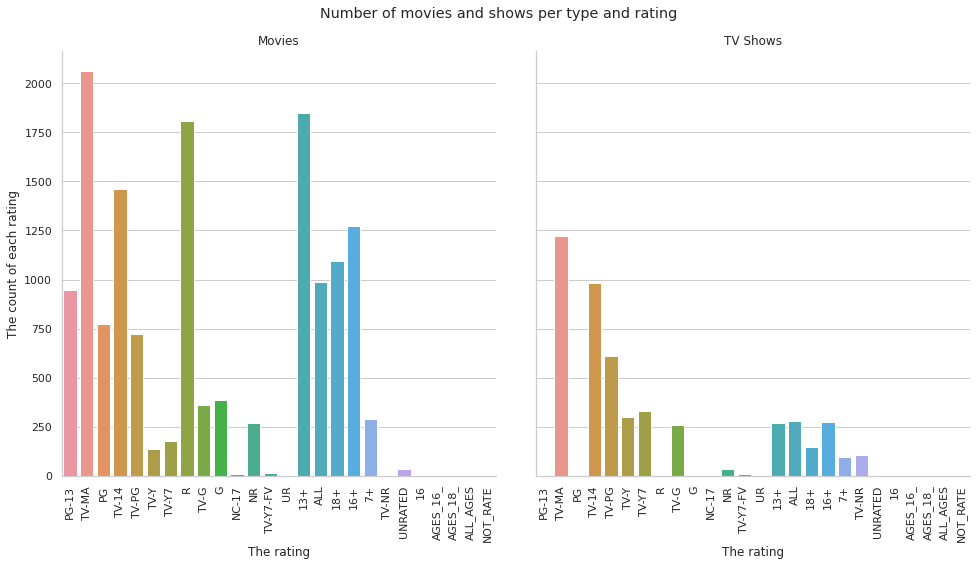

In [62]:
sns.set_style('whitegrid')
sns.set_context('notebook')
g=sns.catplot(x='rating',kind='count',data=df,col='type',height=7)
g.set_xticklabels(rotation=90)
g.set(xlabel='The rating',ylabel='The count of each rating')
g.fig.suptitle('Number of movies and shows per type and rating',y=1.03)
g.set_titles('{col_name}s')

plt.show()


This plot shows the number of movies and shows per rating.

The most common movies rating are TV-MA, +13 and R.

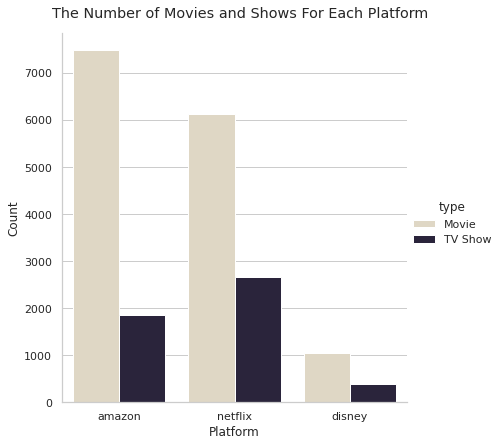

In [63]:
g=sns.catplot(data=df,x='platform',kind='count',palette='ch:s=-.2,r=.6',order=['amazon','netflix','disney'],hue='type',height=6)
g.fig.suptitle('The Number of Movies and Shows For Each Platform',y=1.03)
g.set(xlabel='Platform',ylabel='Count')
plt.show()

This plot shows that most of the movies of this dataset is in amazon and netflix platforms and there are not much data from disney platform.

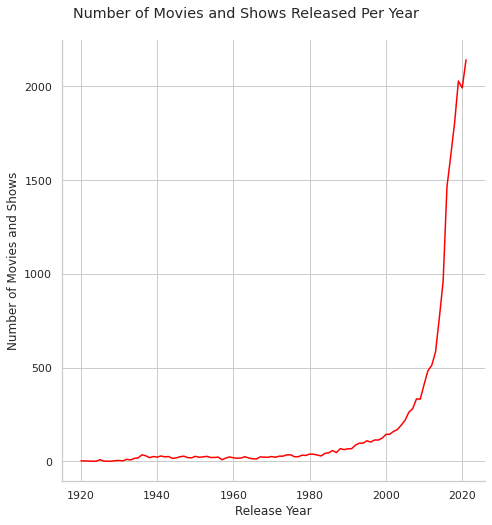

In [64]:
s_m_per_year=df.groupby('release_year').size()
s_m_df=s_m_per_year.reset_index()
s_m_df.columns=['year','frequency']
g=sns.relplot(data=s_m_df, x='year',y='frequency',kind='line',color='r',height=7)
g.fig.suptitle('Number of Movies and Shows Released Per Year',y=1.04)
g.set(xlabel='Release Year',ylabel='Number of Movies and Shows')
plt.show()

This plot shows the number of movies and shows released per year, and it shows that most of the movies and shows in this dataset are released between 2000 and 2020.

In [66]:
c=df_shows['duration'].str.replace(r'\D','')
df_shows['duration']=c.apply(int)

Modifing the duration columns so that it contains only int values.

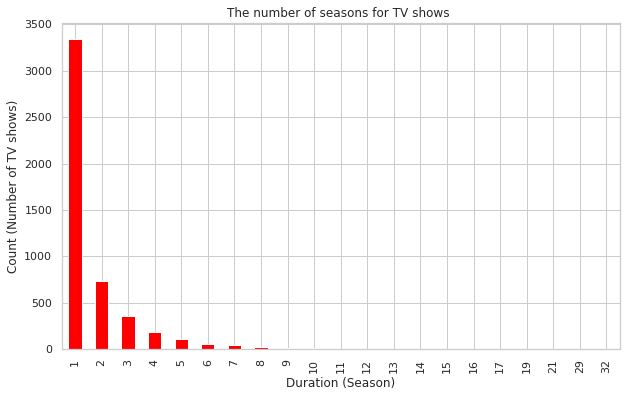

In [67]:
p=df_shows.groupby('duration').size()
p.plot(kind='bar',figsize=(10,6),color='red')
plt.xlabel('Duration (Season)')
plt.ylabel('Count (Number of TV shows)')
plt.title('The number of seasons for TV shows ')
plt.show()

Most of the TV shows have one season in this dataset.

In [68]:
df_movies.duration.str.strip()
df_movies['duration']=df_movies['duration'].str.replace(' min','')


In [69]:
df_movies['duration']=df_movies['duration'].astype(int)

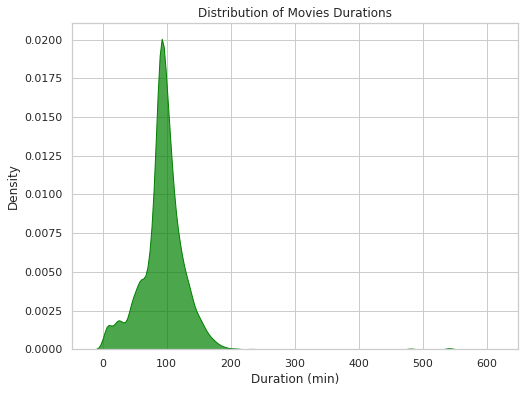

The values of the column duration are normally distributed about the mean which is equal to :  93.64365620736699 min


In [91]:
fig, ax = plt.subplots(figsize=(8, 6))
g=sns.kdeplot(data=df_movies,x='duration', alpha=0.7,color='g',ax=ax,shade=True)
g.set(xlabel='Duration (min)')
g.set_title('Distribution of Movies Durations')
plt.show()
print('The values of the column duration are normally distributed about the mean which is equal to : ', df_movies['duration'].mean(),'min')

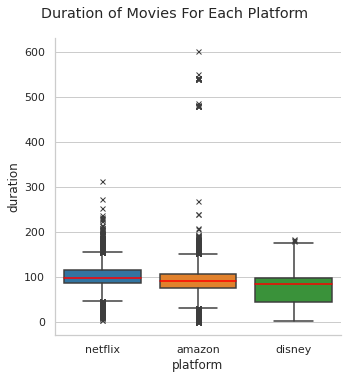

In [71]:
g=sns.catplot(data=df_movies,y='duration',x='platform',kind='box',flierprops={"marker": "x"},medianprops={"color": "red"}, saturation=0.75)
g.fig.suptitle('Duration of Movies For Each Platform',y=1.05)
plt.show()

The median of duration of movies for all platforms is near 100 minutes.   
The duration of movies is more distributed in Disney Platform.

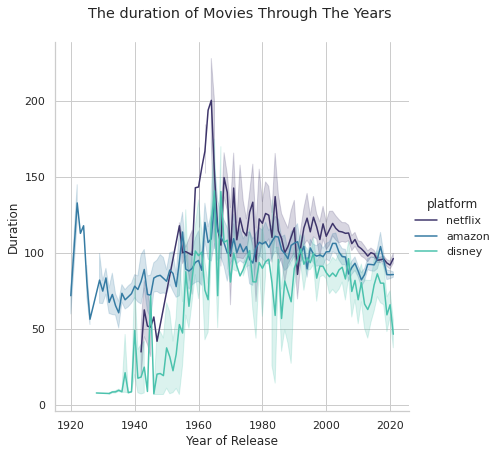

In [72]:
sns.set_style('whitegrid')
g=sns.relplot(data=df_movies,x='release_year',y='duration',kind='line',hue='platform',height=6,palette='mako')
g.fig.suptitle('The duration of Movies Through The Years',y=1.05)
g.set(xlabel='Year of Release',ylabel='Duration')
plt.show()

This plot shows that the duration of Netflix movies are longer than Amazon and Disney movies through the years.

In [92]:
df_movies.to_csv('df_movies.csv')
df_shows.to_csv('df_shows.csv')
df.to_csv('df_modified.csv')